# Подготовка среды и загрузка данных:

# Создание нейронной сети для CIFAR-10

В этом блоке мы создадим нейронную сеть для классификации изображений из датасета CIFAR-10. CIFAR-10 состоит из 60 000 цветных изображений размером 32x32 пикселя, разделенных на 10 классов.

```python
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

Мы начинаем с импорта необходимых библиотек TensorFlow и Keras для создания и обучения нейронной сети.

## Загрузка данных CIFAR-10

Для обучения модели сначала необходимо загрузить данные из датасета CIFAR-10. В CIFAR-10 уже включены обучающие и тестовые данные.


In [2]:
# Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
cifar10_classes = [
    'Самолет (Airplane)',
    'Автомобиль (Automobile)',
    'Птица (Bird)',
    'Кошка (Cat)',
    'Олень (Deer)',
    'Собака (Dog)',
    'Лягушка (Frog)',
    'Лошадь (Horse)',
    'Корабль (Ship)',
    'Грузовик (Truck)'
]

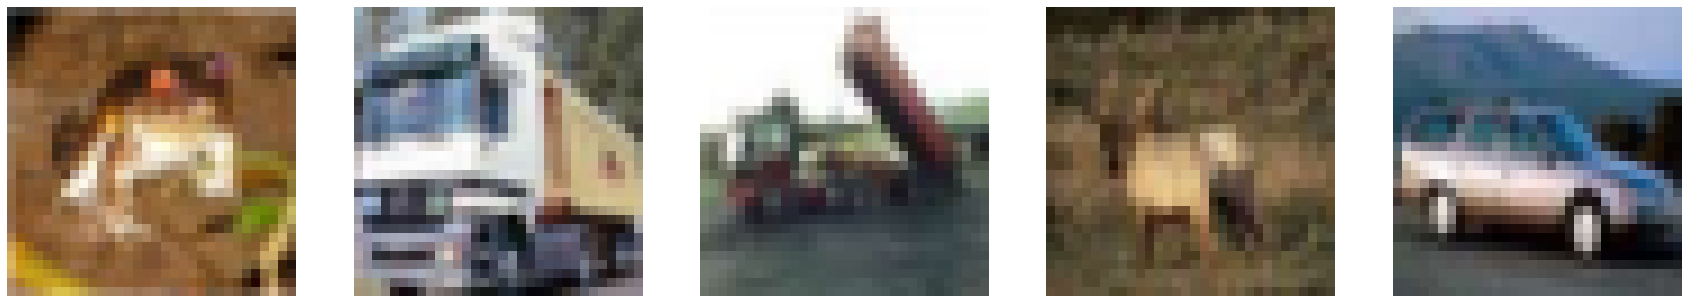

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(30, 20))

for i in range(5):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].axis('off')

In [5]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

В этом коде мы используем функцию cifar10.load_data() для загрузки данных CIFAR-10. Обучающие данные сохраняются в train_images и train_labels, а тестовые данные - в test_images и test_labels.

## Предобработка данных

Для обеспечения правильной работы нейронной сети данные должны быть предобработаны. Это включает в себя нормализацию пикселей и преобразование меток в формат one-hot encoding.


In [6]:
# Нормализация пикселей в диапазоне [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Преобразование меток в формат one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Здесь мы нормализуем значения пикселей изображений, чтобы они находились в диапазоне от 0 до 1, и преобразуем метки классов в формат one-hot encoding.

## Создание модели нейронной сети

Создание архитектуры нейронной сети, включая сверточные слои, слои пулинга, полносвязные слои и слои dropout для предотвращения переобучения.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

В этом блоке кода мы определяем архитектуру модели, включая сверточные слои, слои пулинга, полносвязные слои и слои dropout.

<table>
  <tr>
    <th>Слой</th>
    <th>Параметры</th>
    <th>Назначение</th>
  </tr>
  <tr>
    <td>Conv2D</td>
    <td>
      <ul>
        <li>Количество фильтров: Определяет, сколько различных признаков будет извлечено.</li>
        <li>Размер фильтров: Определяет размер области, которую фильтр анализирует.</li>
        <li>Функция активации: Определяет, какая функция активации будет применяться к выходным данным слоя после свертки.</li>
        <li>Шаг (stride): Определяет, насколько "шагает" фильтр по изображению.</li>
        <li>Заполнение (padding): Определяет, какие значения добавляются вокруг изображения перед сверткой</li>
      </ul>
    </td>
    <td>
      <p>Слой применяет набор фильтров (или ядер) к входному изображению. Каждый фильтр - это небольшая матрица, которая скользит по изображению. Фильтр проверяет различные области изображения и выделяет определенные характеристики, такие как грани, углы и текстуры. Эти характеристики помогают модели понимать, что находится на изображении.</p>
    </td>
  </tr>
  <tr>
    <td>MaxPooling2D</td>
    <td>
      <ul>
        <li>Размер окна пулинга: Определяет размер области, из которой выбирается</li>
        <li>Шаг (stride): Определяет, насколько "шагает" окно пулинга по изображению</li>
      </ul>
    </td>
    <td>
      <p>Слой пулинга, который уменьшает размерность данных, выбирая максимальное значение из каждой группы. Слой пулинга разбивает изображение на неперекрывающиеся области и выбирает максимальное значение из каждой области. Это позволяет уменьшить количество данных, сохраняя при этом наиболее важные признаки. Например, после нескольких сверточных слоев, слой пулинга может уменьшить размер изображения в два раза.</p>
    </td>
  </tr>
  <tr>
    <td>Flatten</td>
    <td>-</td>
    <td>
      <p>Слой, который преобразует многомерные данные в одномерный вектор, подготавливая данные для полносвязных слоев.</p>
    </td>
  </tr>
  <tr>
    <td>Dense (Полносвязный слой)</td>
    <td>
      <ul>
        <li>Количество нейронов (units)</li>
        <li>Функция активации (например, ReLU, sigmoid)</li>
      </ul>
    </td>
    <td>
      <p>Полносвязный слой, в котором каждый нейрон связан со всеми нейронами предыдущего слоя. Он выполняет линейную комбинацию входных данных.</p>
    </td>
  </tr>
  <tr>
    <td>Dropout</td>
    <td>
      <ul>
        <li>Уровень отсева (dropout rate)</li>
      </ul>
    </td>
    <td>
      <p>Слой, который случайным образом исключает часть нейронов во время обучения с некоторой вероятностью. Это помогает предотвратить переобучение.</p>
    </td>
  </tr>
</table>


## Компиляция модели

После создания модели нейронной сети мы компилируем ее, указывая оптимизатор, функцию потерь и метрики для оценки производительности.


In [8]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

*Adam (Adaptive Moment Estimation)** - это оптимизационный алгоритм, который широко используется для обучения нейронных сетей и других моделей машинного обучения. Он является комбинацией двух других оптимизаторов: RMSprop (Root Mean Square Propagation) и Momentum. Adam был предложен Diederik P. Kingma и Jimmy Ba в статье "Adam: A Method for Stochastic Optimization" в 2014 году и с тех пор стал одним из наиболее популярных оптимизаторов.

### Как работает оптимизатор Adam:

1. **Инициализация параметров:**
   Adam начинает с инициализации двух переменных момента (momentum) и скользящего среднего квадратов градиентов (moving average of squared gradients). Эти переменные обычно инициализируются нулями или малыми случайными значениями.

2. **Вычисление градиентов:**
   На каждом шаге обучения вычисляются градиенты функции потерь по параметрам модели.

3. **Обновление момента:**
   Момент (momentum) подобен скорости и определяет, как быстро модель должна двигаться в направлении градиентов. Он обновляется на основе текущих градиентов и предыдущего значения момента. Это помогает ускорить обучение в направлении, в котором градиенты имеют устойчивое направление.

4. **Обновление скользящего среднего квадратов градиентов:**
   Adam также поддерживает скользящее среднее квадратов градиентов, которое используется для нормализации градиентов. Это помогает учитывать разный масштаб градиентов для разных параметров. Скользящее среднее обновляется на основе квадрата текущих градиентов.

5. **Вычисление корректировок смещения:**
   В начале обучения, когда значения момента и скользящего среднего близки к нулю, Adam может быть смещен в сторону нулевых значений. Для исправления этого смещения вычисляются корректировки смещения (bias corrections) для момента и скользящего среднего. Эти коррекции уменьшают смещение в начале обучения.

6. **Обновление параметров модели:**
   Наконец, параметры модели обновляются с использованием вычисленных значений момента, скользящего среднего и градиентов. Adam использует эти значения для определения, как обновить параметры так, чтобы минимизировать функцию потерь.

### Преимущества Adam:
- **Сходимость:** Adam может обеспечить более быструю сходимость к оптимальным параметрам.
- **Адаптивность:** Adam автоматически адаптирует скорость обучения для каждого параметра на основе скользящего среднего квадратов градиентов.
- **Работа с разными масштабами:** Adam эффективно работает с параметрами, имеющими разные масштабы градиентов.

Однако следует отметить, что Adam может быть чувствительным к выбору скорости обучения и требует настройки гиперпараметров для достижения лучших результатов.

<!DOCTYPE html>
<html>
<head>
    <title>Гифка</title>
</head>
<body>
    <a href="https://optimization.cbe.cornell.edu/images/d/d6/1_-_2dKCQHh_-_Long_Valley.gif">
        <img src="https://optimization.cbe.cornell.edu/images/d/d6/1_-_2dKCQHh_-_Long_Valley.gif" alt="Гифка" width="300" height="200">
    </a>
</body>
</html>


<!DOCTYPE html>
<html>
<head>
<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 80%;
    margin: 20px auto;
  }

  th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
  }

  tr:nth-child(even) {
    background-color: #f2f2f2;
  }

  th {
    background-color: #4CAF50;
    color: white;
  }
</style>
</head>
<body>

<h2>Сравнение оптимизаторов: Adam vs. SGD</h2>

<table>
  <tr>
    <th>Характеристика</th>
    <th>Adam</th>
    <th>SGD</th>
  </tr>
  <tr>
    <td>Аббревиатура</td>
    <td>Adam (Adaptive Moment Estimation)</td>
    <td>SGD (Stochastic Gradient Descent)</td>
  </tr>
  <tr>
    <td>Тип оптимизации</td>
    <td>Адаптивный оптимизатор</td>
    <td>Градиентный оптимизатор</td>
  </tr>
  <tr>
    <td>Скорость обучения</td>
    <td>Адаптируется автоматически для каждого параметра</td>
    <td>Фиксированная для всех параметров</td>
  </tr>
  <tr>
    <td>Скорость сходимости</td>
    <td>Обычно быстрее, особенно на начальных этапах</td>
    <td>Может быть медленнее, требует аккуратной настройки</td>
  </tr>
  <tr>
    <td>Адаптивность к разным масштабам</td>
    <td>Да, работает хорошо с параметрами, имеющими разные масштабы</td>
    <td>Требует масштабирования признаков для эффективной работы</td>
  </tr>
  <tr>
    <td>Подходит для глубоких сетей</td>
    <td>Обычно да, хорошо работает с глубокими архитектурами</td>
    <td>Требует тщательной настройки и может быть сложным для глубоких сетей</td>
  </tr>
</table>

</body>
</html>


# Сравнение оптимизаторов SGD и Adam

Оптимизаторы SGD (Stochastic Gradient Descent) и Adam оба используются для обучения нейронных сетей, но они имеют разные характеристики и могут быть лучше в разных сценариях. Вот некоторые сравнительные характеристики SGD и Adam:

## Оптимизатор SGD

1. **Простота:** SGD - это простой и понятный оптимизатор, и он может быть легко настроен.

2. **Меньшее количество памяти:** SGD требует меньше памяти в сравнении с Adam, поскольку он хранит только текущие значения параметров и градиентов.

3. **Скорость обучения можно настроить:** С SGD вы можете явно настроить скорость обучения (learning rate) и изменять ее в процессе обучения.

4. **Стабильность:** В некоторых случаях SGD может быть более стабильным и предсказуемым, особенно при правильной настройке скорости обучения.

## Оптимизатор Adam

1. **Адаптивность скорости обучения:** Adam автоматически адаптирует скорость обучения для каждого параметра на основе скользящего среднего квадратов градиентов. Это позволяет ускорить сходимость и улучшить производительность на большинстве задач.

2. **Работа с разными масштабами градиентов:** Adam эффективно работает с параметрами, имеющими разные масштабы градиентов, что может быть проблемой для SGD.

3. **Популярность и популярные реализации:** Adam стал одним из наиболее популярных оптимизаторов и имеет множество оптимизированных реализаций в библиотеках машинного обучения.

4. **Скорость обучения настраивается автоматически:** В большинстве случаев Adam не требует явной настройки скорости обучения, что может упростить процесс обучения.

Выбор между SGD и Adam зависит от конкретной задачи, архитектуры модели и даже проб и ошибок. В общем случае, Adam часто предпочтителен из-за своей адаптивности и хорошей производительности на многих задачах. Однако в некоторых случаях, особенно с маленькими наборами данных, SGD с правильной настройкой скорости обучения может быть полезным инструментом.


Здесь мы используем оптимизатор Adam с заданной скоростью обучения, функцию потерь categorical crossentropy и метрику accuracy для оценки точности модели.

## Обучение модели

Мы обучаем модель на обучающих данных и оцениваем ее производительность на тестовых данных.


In [9]:
%%time
epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(test_images, test_labels), batch_size=256)

Epoch 1/20
196/196 [==============================] - 19s 91ms/step - loss: 1.8913 - accuracy: 0.2942 - val_loss: 1.5272 - val_accuracy: 0.4564
Epoch 2/20
196/196 [==============================] - 21s 108ms/step - loss: 1.5823 - accuracy: 0.4200 - val_loss: 1.4371 - val_accuracy: 0.4976
Epoch 3/20
196/196 [==============================] - 22s 111ms/step - loss: 1.4630 - accuracy: 0.4739 - val_loss: 1.2706 - val_accuracy: 0.5480
Epoch 4/20
196/196 [==============================] - 23s 119ms/step - loss: 1.3671 - accuracy: 0.5110 - val_loss: 1.2524 - val_accuracy: 0.5510
Epoch 5/20
196/196 [==============================] - 22s 112ms/step - loss: 1.2997 - accuracy: 0.5377 - val_loss: 1.1435 - val_accuracy: 0.5923
Epoch 6/20
196/196 [==============================] - 23s 116ms/step - loss: 1.2348 - accuracy: 0.5643 - val_loss: 1.0959 - val_accuracy: 0.6136
Epoch 7/20
196/196 [==============================] - 26s 131ms/step - loss: 1.1895 - accuracy: 0.5810 - val_loss: 1.0389 - val_acc

Здесь мы используем функцию model.fit() для обучения модели на данных в течение заданного количества эпох.

## Оценка модели

После обучения модели мы оцениваем ее производительность на тестовых данных.


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nТочность на тестовых данных:", test_acc)

313/313 - 3s - loss: 0.8118 - accuracy: 0.7197 - 3s/epoch - 8ms/step

Точность на тестовых данных: 0.7196999788284302
